In [320]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Set the default plot aesthetics to be prettier.
sns.set_style("white")

from sklearn import preprocessing
import numpy as np
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

DATA SET 

In [347]:
df = pd.read_csv('/Users/mille/Desktop/Simple Linear Regression/NYC_crime.csv')


In [348]:
df.head()

,City,Population,Pop2,Violent_crime,Murder_nonneg_nonman,Rape1,Rape2,Robbery,Agg_assault,Property_crime,Burglary,Larceny_theft,Motor_vehicle_theft,Arson3
0,Adams Village,1861.000,3463321.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,6640929.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,8099716.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,9595377936.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,40806544.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan


$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$

Y = property_crime
X(1) = Population
X^2 = Population
X(2) = Murder
X(3) = Robbery



PREPARING THE DATASET 

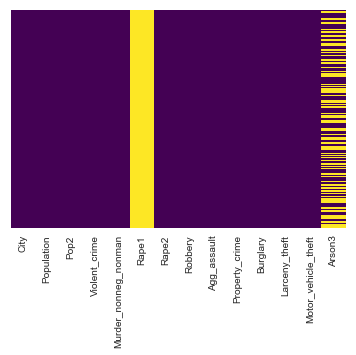

In [323]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [324]:
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 14 columns):
City                    348 non-null object
Population              348 non-null float64
Pop2                    348 non-null float64
Violent_crime           348 non-null float64
Murder_nonneg_nonman    348 non-null float64
Rape1                   0 non-null float64
Rape2                   348 non-null float64
Robbery                 348 non-null float64
Agg_assault             348 non-null float64
Property_crime          348 non-null float64
Burglary                348 non-null float64
Larceny_theft           348 non-null float64
Motor_vehicle_theft     348 non-null float64
Arson3                  187 non-null float64
dtypes: float64(13), object(1)
memory usage: 38.1+ KB


In [351]:
subset_df = df.loc[:, 'City':'Property_crime'].head()
subset_df

,City,Population,Pop2,Violent_crime,Murder_nonneg_nonman,Rape1,Rape2,Robbery,Agg_assault,Property_crime
0,Adams Village,1861.000,3463321.000,0.000,0.000,nan,0.000,0.000,0.000,12.000
1,Addison Town and Village,2577.000,6640929.000,3.000,0.000,nan,0.000,0.000,3.000,24.000
2,Akron Village,2846.000,8099716.000,3.000,0.000,nan,0.000,0.000,3.000,16.000
3,Albany,97956.000,9595377936.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000
4,Albion Village,6388.000,40806544.000,23.000,0.000,nan,3.000,4.000,16.000,223.000


In [352]:
missing_values_count = df.isnull().sum()

missing_values_count[0:10]


City                      0
Population                0
Pop2                      0
Violent_crime             0
Murder_nonneg_nonman      0
Rape1                   348
Rape2                     0
Robbery                   0
Agg_assault               0
Property_crime            0
dtype: int64

In [353]:
missing_values_count[0:10]

City                      0
Population                0
Pop2                      0
Violent_crime             0
Murder_nonneg_nonman      0
Rape1                   348
Rape2                     0
Robbery                   0
Agg_assault               0
Property_crime            0
dtype: int64

Y = Property_crime
X(1) = Population
X^2 = Population
X(2) = Murder
X(3) = Robbery


In [354]:
subset_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
City                    5 non-null object
Population              5 non-null float64
Pop2                    5 non-null float64
Violent_crime           5 non-null float64
Murder_nonneg_nonman    5 non-null float64
Rape1                   0 non-null float64
Rape2                   5 non-null float64
Robbery                 5 non-null float64
Agg_assault             5 non-null float64
Property_crime          5 non-null float64
dtypes: float64(9), object(1)
memory usage: 480.0+ bytes


In [355]:
subset_df['Population'] = subset_df[['Population']].convert_objects(convert_numeric=True)
subset_df['Violent_crime'] = subset_df[['Violent_crime']].convert_objects(convert_numeric=True)
subset_df['Robbery'] = subset_df[['Robbery']].convert_objects(convert_numeric=True)
subset_df['Property_crime'] = subset_df[['Property_crime']].convert_objects(convert_numeric=True)
subset_df['Pop2'] = subset_df[['Pop2']].convert_objects(convert_numeric=True)
subset_df['Murder_nonneg_nonman'] = subset_df[['Murder_nonneg_nonman']].convert_objects(convert_numeric=True)



subset_df.head()


C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel packag

,City,Population,Pop2,Violent_crime,Murder_nonneg_nonman,Rape1,Rape2,Robbery,Agg_assault,Property_crime
0,Adams Village,1861.000,3463321.000,0.000,0.000,nan,0.000,0.000,0.000,12.000
1,Addison Town and Village,2577.000,6640929.000,3.000,0.000,nan,0.000,0.000,3.000,24.000
2,Akron Village,2846.000,8099716.000,3.000,0.000,nan,0.000,0.000,3.000,16.000
3,Albany,97956.000,9595377936.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000
4,Albion Village,6388.000,40806544.000,23.000,0.000,nan,3.000,4.000,16.000,223.000


In [356]:
subset_df.fillna(0)


,City,Population,Pop2,Violent_crime,Murder_nonneg_nonman,Rape1,Rape2,Robbery,Agg_assault,Property_crime
0,Adams Village,1861.000,3463321.000,0.000,0.000,0.000,0.000,0.000,0.000,12.000
1,Addison Town and Village,2577.000,6640929.000,3.000,0.000,0.000,0.000,0.000,3.000,24.000
2,Akron Village,2846.000,8099716.000,3.000,0.000,0.000,0.000,0.000,3.000,16.000
3,Albany,97956.000,9595377936.000,791.000,8.000,0.000,30.000,227.000,526.000,4090.000
4,Albion Village,6388.000,40806544.000,23.000,0.000,0.000,3.000,4.000,16.000,223.000


In [357]:
subset_df.columns = subset_df.columns.str.replace(' ', '')

In [358]:
subset_df.head()

,City,Population,Pop2,Violent_crime,Murder_nonneg_nonman,Rape1,Rape2,Robbery,Agg_assault,Property_crime
0,Adams Village,1861.000,3463321.000,0.000,0.000,nan,0.000,0.000,0.000,12.000
1,Addison Town and Village,2577.000,6640929.000,3.000,0.000,nan,0.000,0.000,3.000,24.000
2,Akron Village,2846.000,8099716.000,3.000,0.000,nan,0.000,0.000,3.000,16.000
3,Albany,97956.000,9595377936.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000
4,Albion Village,6388.000,40806544.000,23.000,0.000,nan,3.000,4.000,16.000,223.000


In [359]:
subset_df.fillna(0)


,City,Population,Pop2,Violent_crime,Murder_nonneg_nonman,Rape1,Rape2,Robbery,Agg_assault,Property_crime
0,Adams Village,1861.000,3463321.000,0.000,0.000,0.000,0.000,0.000,0.000,12.000
1,Addison Town and Village,2577.000,6640929.000,3.000,0.000,0.000,0.000,0.000,3.000,24.000
2,Akron Village,2846.000,8099716.000,3.000,0.000,0.000,0.000,0.000,3.000,16.000
3,Albany,97956.000,9595377936.000,791.000,8.000,0.000,30.000,227.000,526.000,4090.000
4,Albion Village,6388.000,40806544.000,23.000,0.000,0.000,3.000,4.000,16.000,223.000


In [360]:
subset_df.dtypes

City                     object
Population              float64
Pop2                    float64
Violent_crime           float64
Murder_nonneg_nonman    float64
Rape1                   float64
Rape2                   float64
Robbery                 float64
Agg_assault             float64
Property_crime          float64
dtype: object

In [361]:
subset_df['Pop_sq'] = subset_df['Population']**2

In [362]:
subset_df.head()

,City,Population,Pop2,Violent_crime,Murder_nonneg_nonman,Rape1,Rape2,Robbery,Agg_assault,Property_crime,Pop_sq
0,Adams Village,1861.000,3463321.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,3463321.000
1,Addison Town and Village,2577.000,6640929.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,6640929.000
2,Akron Village,2846.000,8099716.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,8099716.000
3,Albany,97956.000,9595377936.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,9595377936.000
4,Albion Village,6388.000,40806544.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,40806544.000


EXPLORATORY DATA ANALYSIS

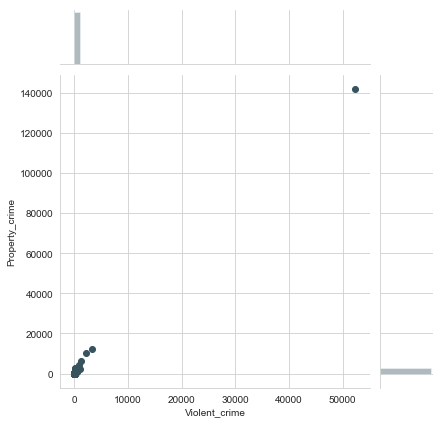

In [363]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

sns.jointplot(x='Violent_crime',y='Property_crime',data=df)

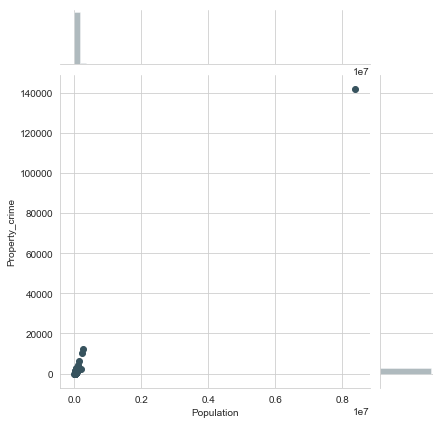

In [364]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

sns.jointplot(x='Population',y='Property_crime',data=df)

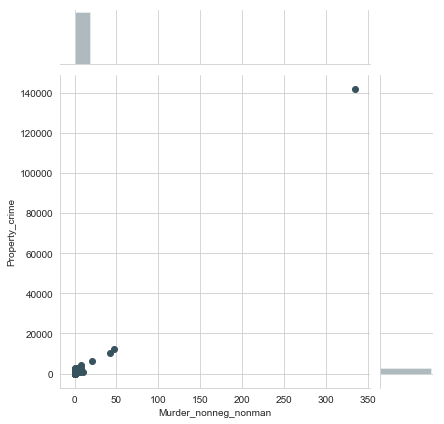

In [365]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

sns.jointplot(x='Murder_nonneg_nonman',y='Property_crime',data=df)

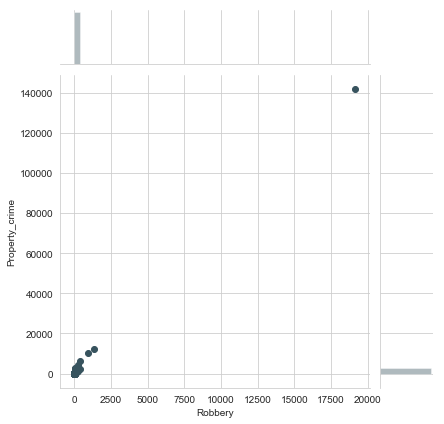

In [366]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

sns.jointplot(x='Robbery',y='Property_crime',data=df)

Identifying outliers and removing them. By using the .loc we can find the position 
where the outlier is the dataset. Knowing a little bit about the demographics and population can be very useful indentifying the outlier here. New York city is by far and away larger then any other city in the state of New York. Thus the reason for causing the outlier. 

         City  Population               Pop2  Violent_crime  \
216  New York 8396126.000 70494931807876.000      52384.000   

     Murder_nonneg_nonman  Rape1    Rape2   Robbery  Agg_assault  \
216               335.000    nan 1112.000 19170.000    31767.000   

     Property_crime  Burglary  Larceny_theft  Motor_vehicle_theft  Arson3  
216      141971.000 16606.000     117931.000             7434.000     nan  


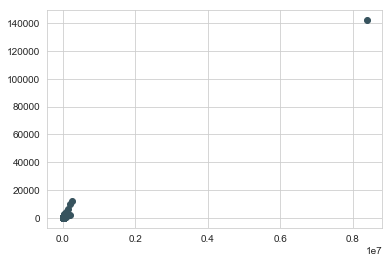

In [389]:


print(df.loc[df['Population']==max(df['Population']),:])

plt.scatter(df['Population'],df['Property_crime'])
plt.show()

Once the outlier is removed we can start to see a better picture of what is going on with the data. 

In [390]:
nonyc=df.loc[df['City']!="New York",:]

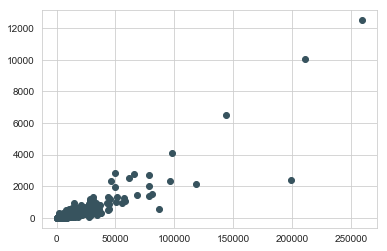

In [391]:
plt.scatter(nonyc['Population'],nonyc['Property_crime'])
plt.show()

TRAINING and TESTING DATA
$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$

In [422]:

# Alright, that's better.  Now the binary variables
nonyc['Robbery']=np.where(nonyc['Robbery']>0,1,0)
nonyc['Murder']=np.where(nonyc['Murder_nonneg_nonman']>0,1,0)

# Finally, the squared pop variable.  
nonyc['Pop_sq']=nonyc['Population']*nonyc['Population']

print(nonyc.head())

                       City  Population           Pop2  Violent_crime  \
0             Adams Village    1861.000    3463321.000          0.000   
1  Addison Town and Village    2577.000    6640929.000          3.000   
2             Akron Village    2846.000    8099716.000          3.000   
3                    Albany   97956.000 9595377936.000        791.000   
4            Albion Village    6388.000   40806544.000         23.000   

   Murder_nonneg_nonman  Rape1  Rape2  Robbery  Agg_assault  Property_crime  \
0                 0.000    nan  0.000        0        0.000          12.000   
1                 0.000    nan  0.000        0        3.000          24.000   
2                 0.000    nan  0.000        0        3.000          16.000   
3                 8.000    nan 30.000        1      526.000        4090.000   
4                 0.000    nan  3.000        1       16.000         223.000   

   Burglary  Larceny_theft  Motor_vehicle_theft  Arson3  Murder         Pop_sq  
0    

C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [423]:
y = nonyc['Property_crime']

In [424]:
X = nonyc[['Population', 'Pop2', 'Murder_nonneg_nonman', 'Robbery']]

In [425]:
from sklearn.model_selection import train_test_split

In [426]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [427]:
from sklearn.linear_model import LinearRegression

In [428]:
lm = LinearRegression()

In [429]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [430]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 2.17959699e-02 -4.15249834e-08  1.87239996e+02  4.04159588e+01]


Predicting Test data by plotting 

In [431]:
predictions = lm.predict( X_test)

Modeled linear regression without the outlier of NYC. 

Text(0,0.5,'Predicted Y')

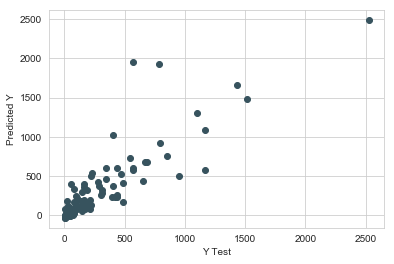

In [432]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Evaluating the model Performance: 

This is done by calculating the residual sum of squares and the explained variance score R squared. 

In [433]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 117.26229643367456
MSE: 52064.62430650684
RMSE: 228.17673918808384


Plotting the residuals

It is a pretty good normal distribution of the residuals. This is a good sign for model fitting with the linear regression. 


C:\Users\mille\Conda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


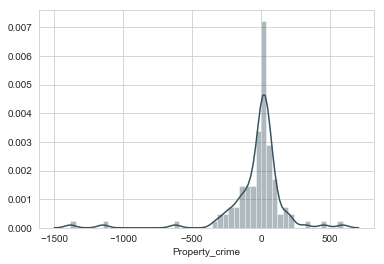

In [434]:
sns.distplot((y_test-predictions),bins=50);

In [435]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Population,0.022
Pop2,-0.000
Murder_nonneg_nonman,187.240
Robbery,40.416


Interpreting the coefficients:

A. Holding all other features fixed, a 1 unit increase in Population is associated with an increase of 0.022 in the Property Crime. 

B. Holding all other features fixed, a 1 unit increase in Pop2 (population squared) is associated with an increase of -0.000 in the Property Crime.

C. Holding all other features fixed, a 1 unit increase in Murder (Murder_nonneg_nonman) is associated with an increase of 187.240 in the Property Crime.

D. Holding all other features fixed, a 1 unit increase in Length of Robbery is associated with an increase of 40.416 in the Property Crime.
    